In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
import numpy as np

In [4]:
data= pd.read_csv("/content/Stroke prediction_ANN.csv")

In [5]:
pd.set_option("display.max_columns", None)
print(data)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [6]:
cont_var=['id','age','avg_glucose_level','bmi']
binary_var=['hypertension','heart_disease','stroke']

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# bmi feature has null values

In [9]:
data[cont_var].describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


In [10]:
# since ['hypertension',heart_disease','stroke'] are binary variables mean is not valid here.let us look at other statistics described here.
data[binary_var].describe()

,hypertension,heart_disease,stroke
count,5110.000000,5110.000000,5110.000000
mean,0.097456,0.054012,0.048728
std,0.296607,0.226063,0.215320
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000


In [11]:
data.describe(include='O') # all categorical

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [12]:
data.isnull().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [13]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [14]:
data.dtypes

,0
id,int64
gender,object
age,float64
hypertension,int64
heart_disease,int64
ever_married,object
work_type,object
Residence_type,object
avg_glucose_level,float64
bmi,float64


In [15]:
numerical=data.select_dtypes(exclude='O').columns

In [16]:
categorical=data.select_dtypes(include='O').columns
categorical

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

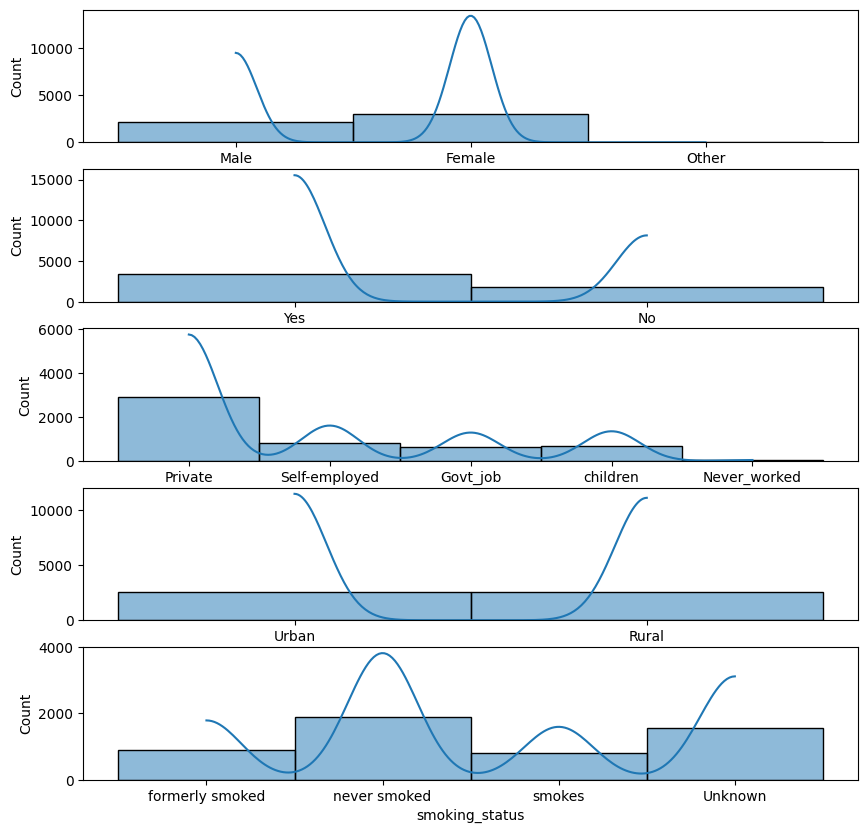

In [17]:
# DATA VISUALIZATION
plt.figure(figsize=(10,10))
plotnum=1
for i in categorical:
  plt.subplot(5,1,plotnum)
  plt.subplots_adjust(wspace=5)
  sns.histplot(x=i,data=data, kde=True)
  plotnum=plotnum+1
  plt.show

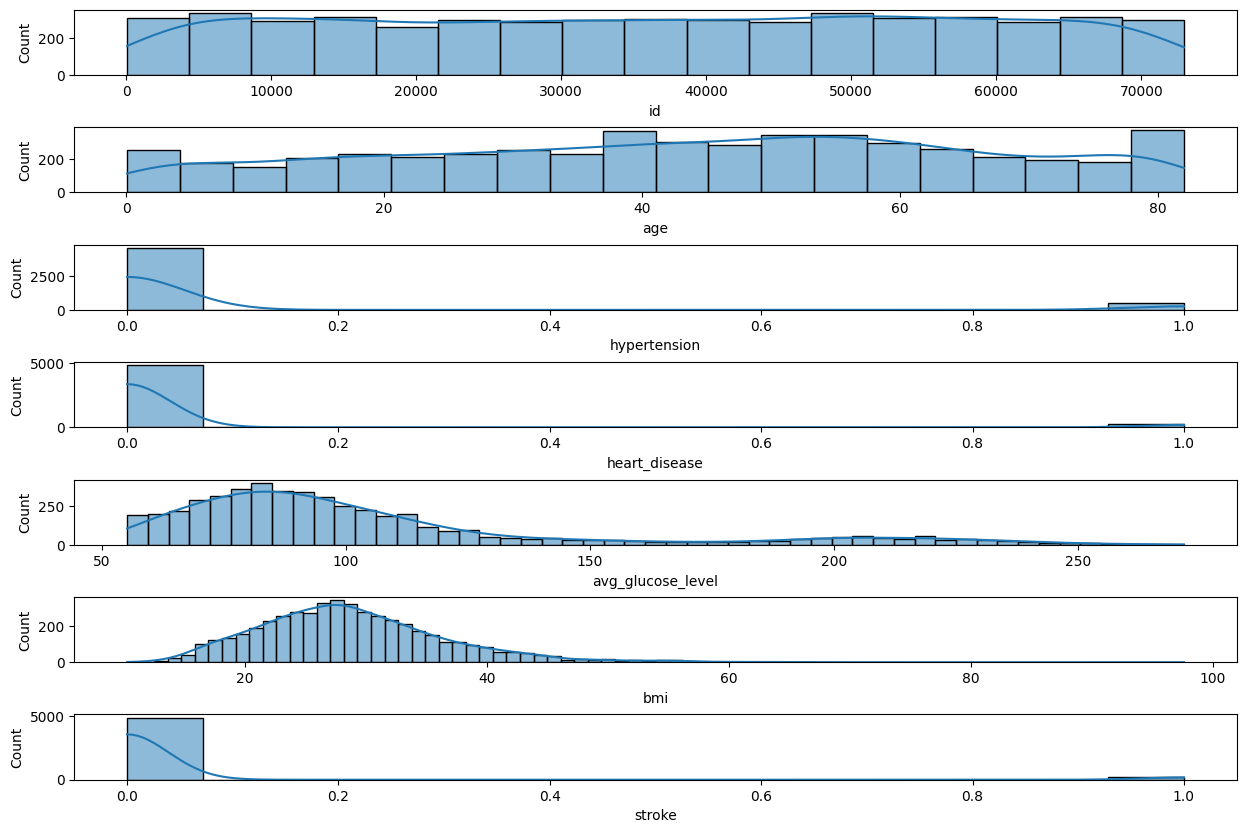

In [18]:
plt.figure(figsize=(15,10))
plotnum=1
for i in numerical:
  plt.subplot(7,1,plotnum)
  plt.subplots_adjust(hspace=0.8,wspace=10)
  sns.histplot(x=i,data=data, kde = True)
  plotnum=plotnum+1
  plt.show

In [19]:
# all features are skewed.. don't follow normal distribution

In [20]:
# let us replace the null values in BMI with its median
median=data.bmi.median()
data.bmi=data.bmi.fillna(median)

<ipython-input-21-57b795e41c11>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data.bmi)


<Axes: ylabel='Density'>

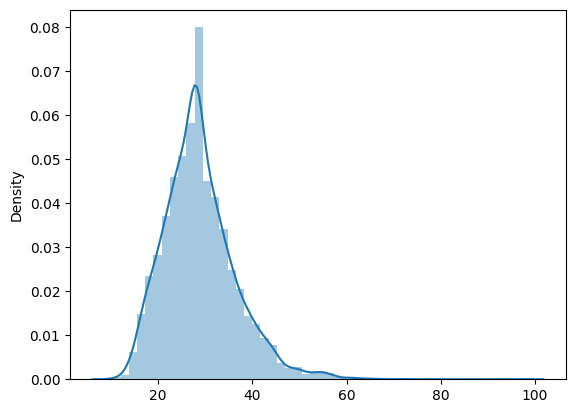

In [21]:
sns.distplot(x=data.bmi)

<Axes: xlabel='stroke', ylabel='count'>

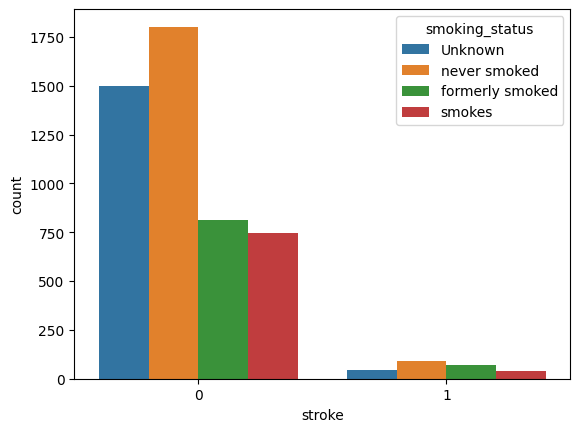

In [22]:
sns.countplot(x=data.stroke, hue=data.smoking_status)

in the visualization it seems that stroke is not dependent on whether he was a smoke or not.

<Axes: xlabel='heart_disease', ylabel='stroke'>

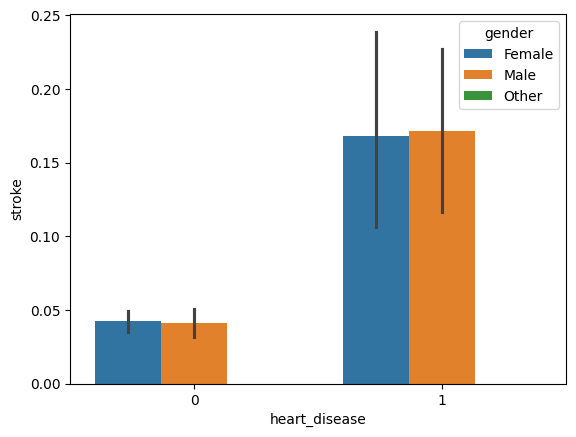

In [23]:
sns.barplot(x=data['heart_disease'], y=data['stroke'], hue=data.gender)

people with heart_disease are more likely to have a stroke compared to those without heart disease.

<Axes: xlabel='hypertension', ylabel='stroke'>

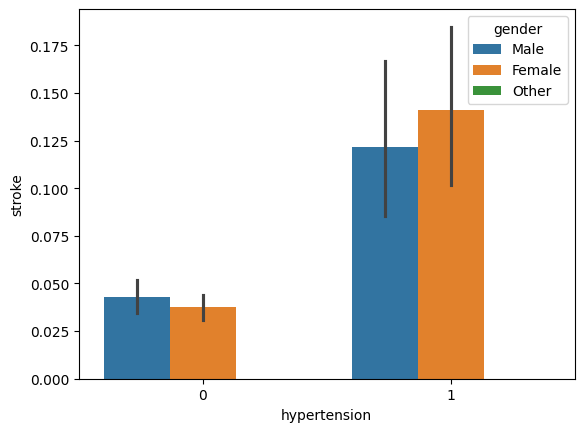

In [24]:
sns.barplot(x=data['hypertension'], y=data['stroke'], hue=data.gender)

people with hypertension are more likely to stroke compared to others with no hypertension.

In [25]:
heart_stroke_data=data.groupby('heart_disease')['stroke'].value_counts().unstack()
heart_stroke_data

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


<Axes: xlabel='stroke', ylabel='count'>

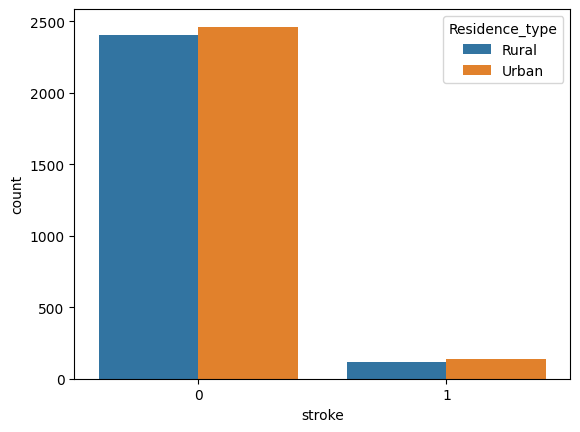

In [26]:
sns.countplot(x="stroke", hue="Residence_type", data=data)

#residence_type also doesnt have any impact on stroke.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 58.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='stroke', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 76.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


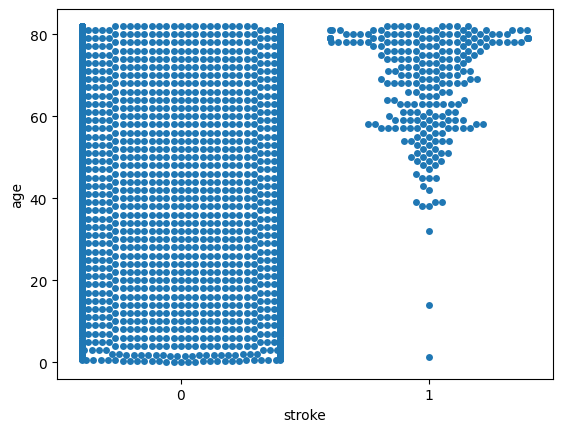

In [27]:
sns.swarmplot(y="age",x="stroke", data=data)

#people of all ages are represented in the group that did not have stroke. in people who had stroke, it is more there in people above 60 yr old and only few  had stroke in the age group 0 to 40.

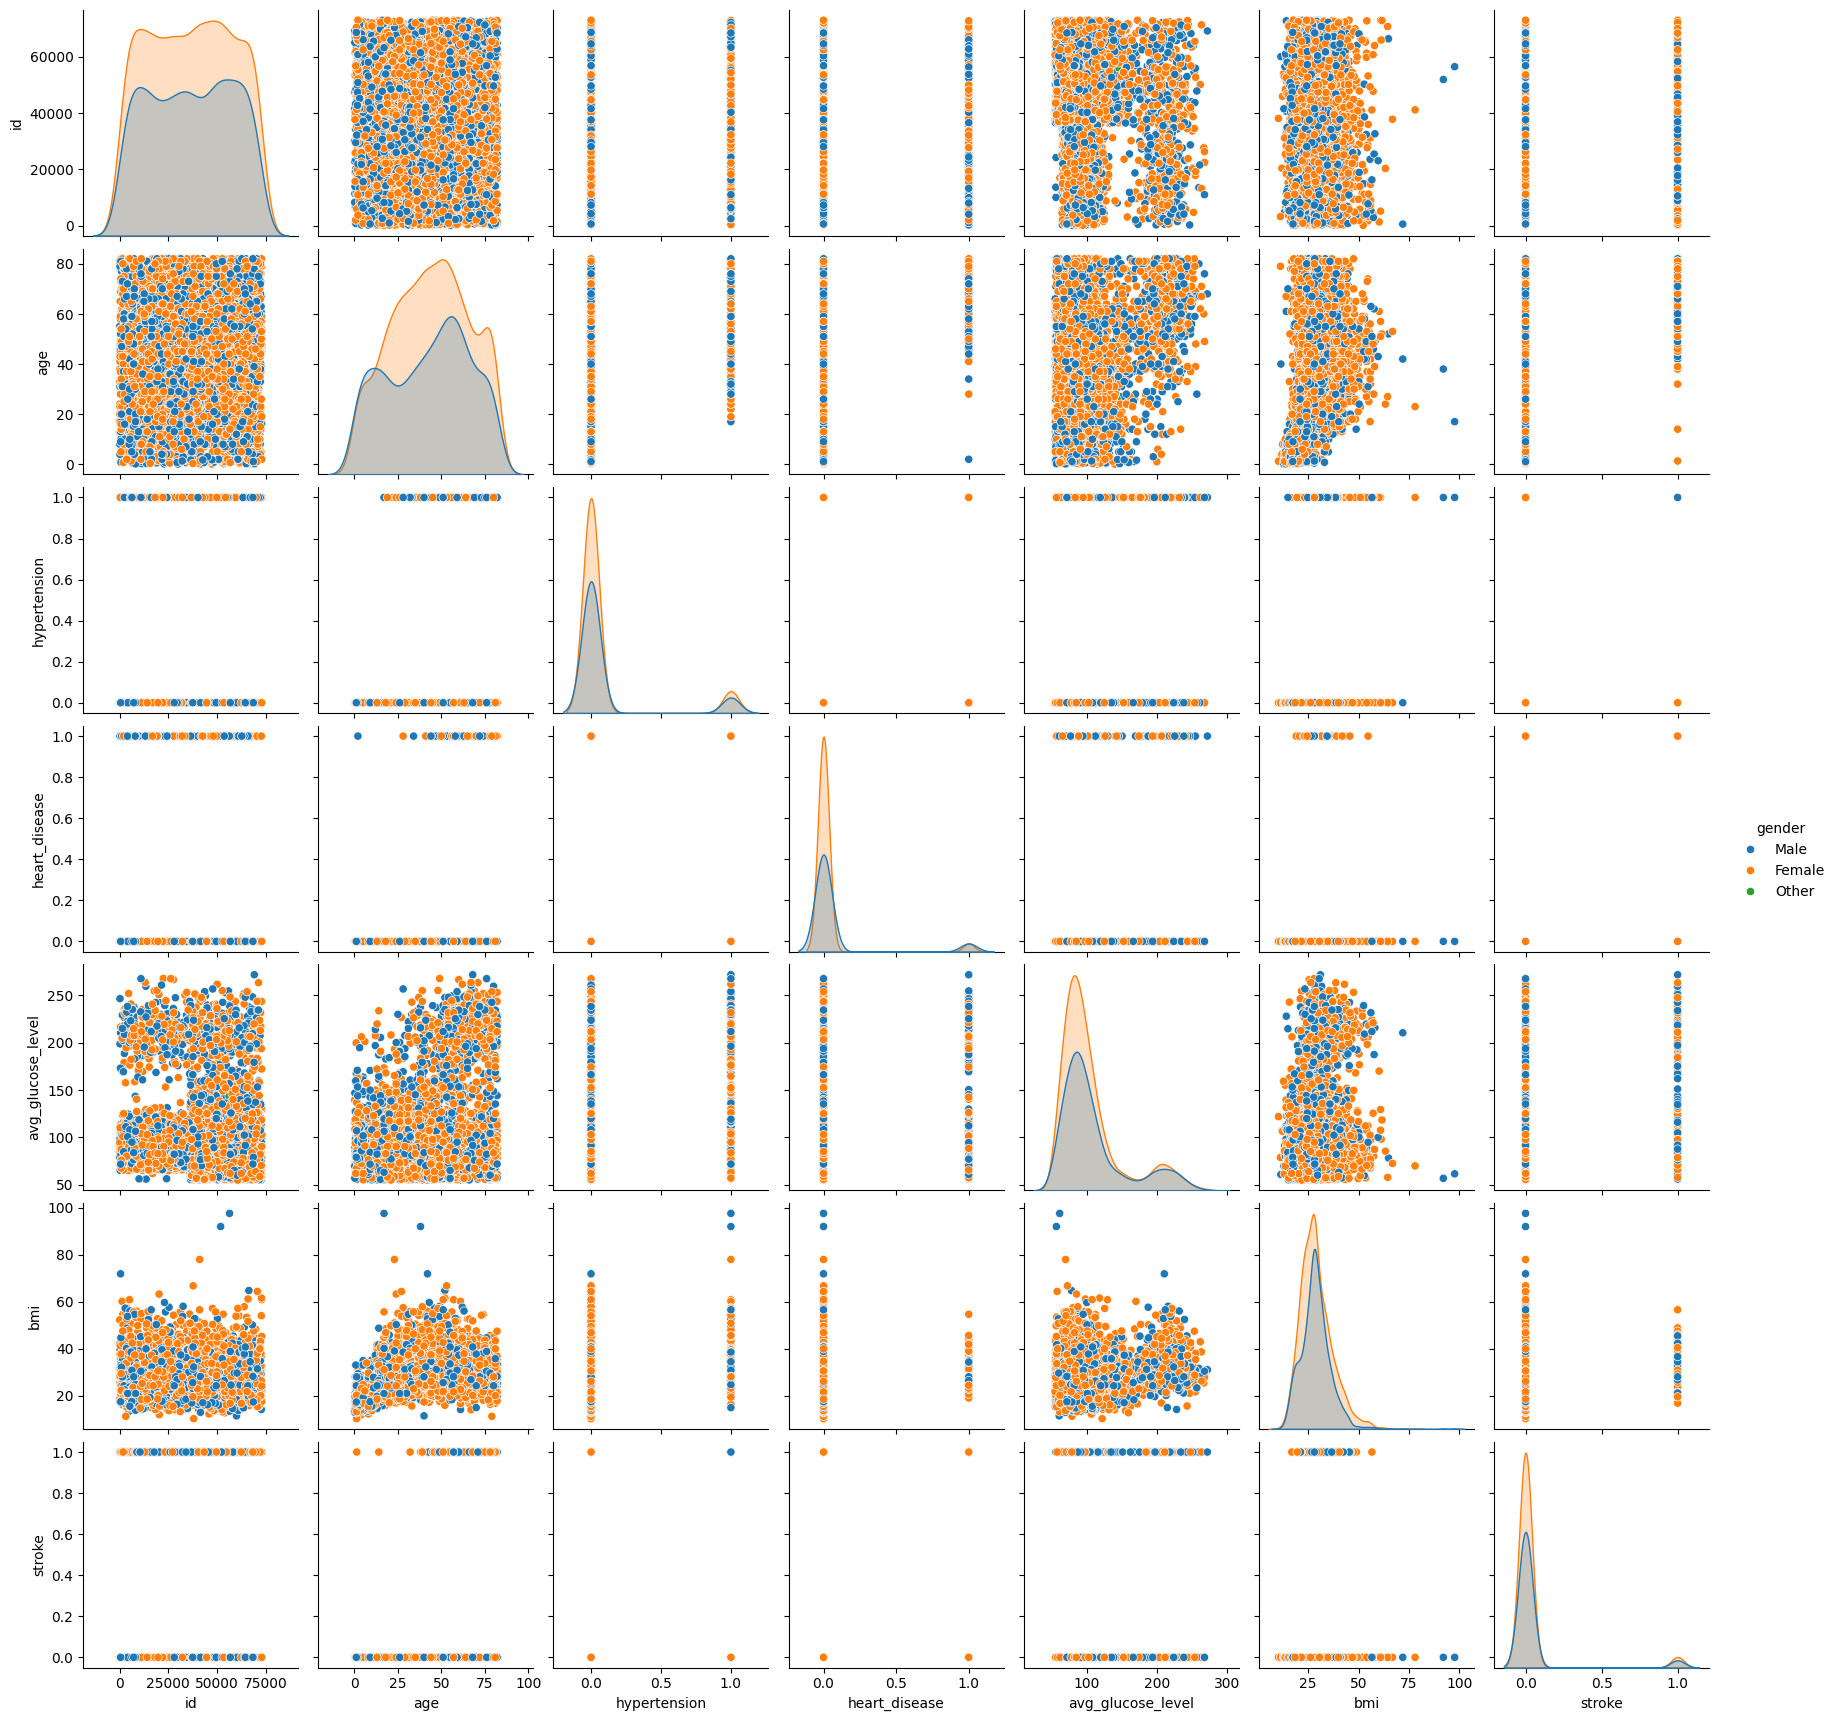

In [28]:
sns.pairplot(data, hue='gender')

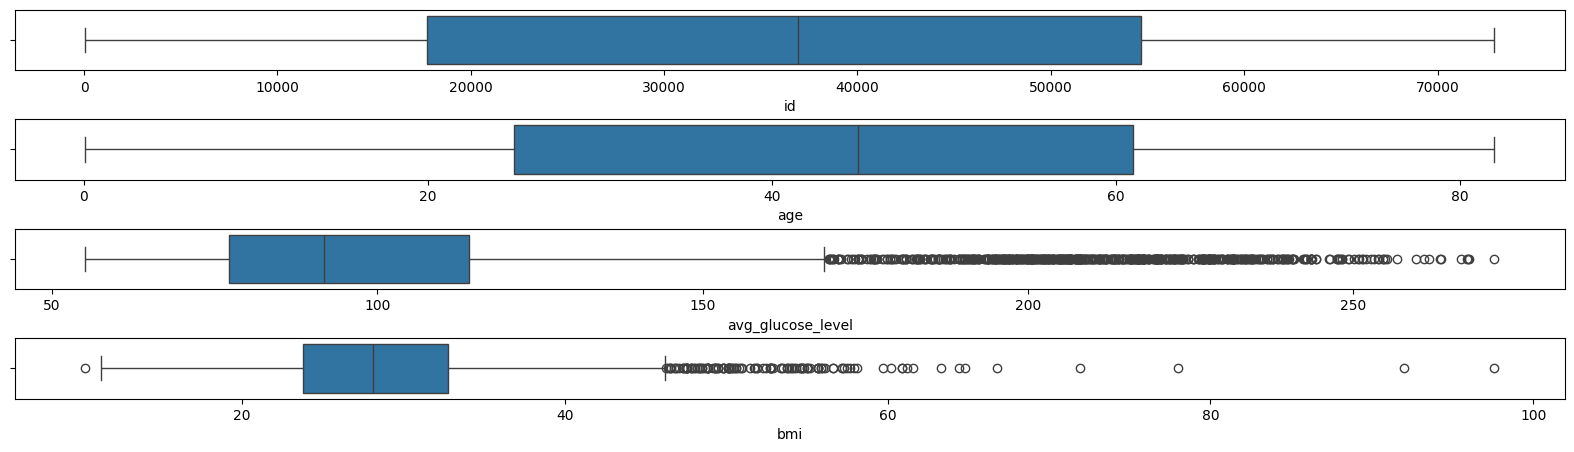

In [29]:
plt.figure(figsize=(20,15))
plotnum=1
for i in cont_var:
  plt.subplot(11,1,plotnum)
  plt.subplots_adjust(wspace=10, hspace=.8)
  sns.boxplot(x=data[i])
  plotnum+=1
  plt.show


In [30]:
# removing outliers in avg_glucose_level and bmi

In [31]:
data.loc[data['avg_glucose_level']>260,'avg_glucose_level']=data.avg_glucose_level.median()

In [32]:
data.loc[data['bmi']>59,'bmi']=data.bmi.median()

In [33]:
# we dont need the column id to predict stroke. so let us remove that column.
data.drop(columns='id', inplace=True)

In [34]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [35]:
for i in binary_var:
  print(data[i].value_counts())

hypertension
0    4612
1     498
Name: count, dtype: int64
heart_disease
0    4834
1     276
Name: count, dtype: int64
stroke
0    4861
1     249
Name: count, dtype: int64


In [36]:
# here hypertension, heart_disease and stoke making this data imbalanced

In [37]:
# scaling using min-max scalar
cont_var.remove('id') # updating cont_var by removing 'id' from it.
cont_var

['age', 'avg_glucose_level', 'bmi']

In [38]:
#converting categorical features to numerical
#for [gender, ever_married, work_type, residence_type, smoking_status] we can use one hot encoding
#since they dont have an ordinal relationship.

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
preprocessor=make_column_transformer(
    (MinMaxScaler(), cont_var),
    (OneHotEncoder(), categorical,'onehotencoder'))

In [40]:

preprocessor.fit(data)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'avg_glucose_level', 'bmi']),
                                ('onehotencoder', OneHotEncoder(),
                                 Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object'))])

In [41]:
encoded_columns = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(categorical)
all_columns = cont_var + list(encoded_columns)
transformed_data = preprocessor.fit_transform(data)

In [42]:
transformed_df= pd.DataFrame(transformed_data,columns=all_columns)

In [43]:
transformed_df

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0.848712,0.550209,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.743652,0.719231,0.372385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.975586,0.248399,0.464435,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.597168,0.567747,0.504184,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.963379,0.581879,0.286611,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,0.139993,0.372385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,0.987793,0.342673,0.621339,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,0.426270,0.136277,0.424686,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,0.621582,0.543592,0.320084,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [44]:
data[binary_var]

,hypertension,heart_disease,stroke
0,0,1,1
1,0,0,1
2,0,1,1
3,0,0,1
4,1,0,1
...,...,...,...
5105,1,0,0
5106,0,0,0
5107,0,0,0
5108,0,0,0


In [45]:
final_df=pd.concat([transformed_df,data[binary_var]], axis=1)

In [46]:
final_df

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension,heart_disease,stroke
0,0.816895,0.848712,0.550209,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,1
1,0.743652,0.719231,0.372385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,1
2,0.975586,0.248399,0.464435,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1,1
3,0.597168,0.567747,0.504184,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,1
4,0.963379,0.581879,0.286611,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,0.139993,0.372385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0,0
5106,0.987793,0.342673,0.621339,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0,0,0
5107,0.426270,0.136277,0.424686,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0
5108,0.621582,0.543592,0.320084,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0


In [47]:
final_df.corr()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension,heart_disease,stroke
age,1.000000,0.233851,0.340418,0.027924,-0.027623,-0.010659,-0.679125,0.679125,0.130013,-0.078653,0.116534,0.327989,-0.634215,-0.014180,0.014180,-0.378231,0.236897,0.119307,0.073133,0.276398,0.263796,0.245257
avg_glucose_level,0.233851,1.000000,0.176949,-0.056600,0.056271,0.011711,-0.153442,0.153442,0.009863,-0.014388,0.018491,0.062257,-0.100687,0.004105,-0.004105,-0.093293,0.067999,0.023112,0.016460,0.168377,0.161801,0.127820
bmi,0.340418,0.176949,1.000000,0.028292,-0.027952,-0.012033,-0.344952,0.344952,0.086986,-0.028545,0.201509,0.077106,-0.455042,-0.003434,0.003434,-0.276345,0.114871,0.110233,0.083575,0.147840,0.042103,0.041072
gender_Female,0.027924,-0.056600,0.028292,1.000000,-0.999597,-0.016642,-0.030483,0.030483,0.016685,-0.011469,0.032294,0.026143,-0.089120,-0.006340,0.006340,-0.059393,-0.043603,0.099111,-0.011306,-0.021143,-0.085617,-0.009027
gender_Male,-0.027623,0.056271,-0.027952,-0.999597,1.000000,-0.011757,0.029936,-0.029936,-0.016534,0.011496,-0.032639,-0.025971,0.089283,0.005937,-0.005937,0.059658,0.042738,-0.098813,0.011477,0.021275,0.085717,0.009117
gender_Other,-0.010659,0.011711,-0.012033,-0.016642,-0.011757,1.000000,0.019327,-0.019327,-0.005374,-0.000920,0.012092,-0.006112,-0.005514,0.014217,-0.014217,-0.009206,0.030568,-0.010728,-0.005978,-0.004597,-0.003343,-0.003166
ever_married_No,-0.679125,-0.153442,-0.344952,-0.030483,0.029936,0.019327,1.000000,-1.000000,-0.134041,0.090838,-0.153830,-0.192716,0.544441,0.006261,-0.006261,0.332081,-0.171256,-0.102845,-0.105226,-0.164243,-0.114644,-0.108340
ever_married_Yes,0.679125,0.153442,0.344952,0.030483,-0.029936,-0.019327,-1.000000,1.000000,0.134041,-0.090838,0.153830,0.192716,-0.544441,-0.006261,0.006261,-0.332081,0.171256,0.102845,0.105226,0.164243,0.114644,0.108340
work_type_Govt_job,0.130013,0.009863,0.086986,0.016685,-0.016534,-0.005374,-0.134041,0.134041,1.000000,-0.025258,-0.444420,-0.167810,-0.151383,-0.013131,0.013131,-0.097418,0.029686,0.046908,0.030026,0.017685,0.001330,0.002677
work_type_Never_worked,-0.078653,-0.014388,-0.028545,-0.011469,0.011496,-0.000920,0.090838,-0.090838,-0.025258,1.000000,-0.076081,-0.028728,-0.025915,-0.022859,0.022859,0.008804,-0.030095,0.036238,-0.028099,-0.021608,-0.015712,-0.014882


In [48]:
final_df.stroke.value_counts()

,count
stroke,
0,4861
1,249


the data is imbalanced.

In [49]:
x=final_df.iloc[:,:-1]
y=final_df.stroke
##creating training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                test_size=0.2,random_state=10)

In [50]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=42)
X_train, Y_train=smote.fit_resample(x_train,y_train)


In [51]:
print(pd.Series(Y_train).value_counts())

stroke
0    3901
1    3901
Name: count, dtype: int64


In [56]:
#from sklearn.neural_network import MLPClassifier
#model=MLPClassifier(hidden_layer_sizes=(100,50,30),activation="relu",solver="adam",learning_rate_init=0.1, alpha=0.1,
                      #max_iter=500,n_iter_no_change=100,
                       #random_state=10,verbose=True,batch_size=100)



In [57]:
model.fit(X_train,Y_train)

Iteration 1, loss = 0.80678649
Iteration 2, loss = 0.52694532
Iteration 3, loss = 0.52381140
Iteration 4, loss = 0.55473450
Iteration 5, loss = 0.56507919
Iteration 6, loss = 0.57323716
Iteration 7, loss = 0.52147567
Iteration 8, loss = 0.51312492
Iteration 9, loss = 0.47503060
Iteration 10, loss = 0.50633727
Iteration 11, loss = 0.47511126
Iteration 12, loss = 0.50005159
Iteration 13, loss = 0.49168923
Iteration 14, loss = 0.47716055
Iteration 15, loss = 0.49450314
Iteration 16, loss = 0.48208701
Iteration 17, loss = 0.49756855
Iteration 18, loss = 0.49530914
Iteration 19, loss = 0.48133459
Iteration 20, loss = 0.48650540
Iteration 21, loss = 0.48687612
Iteration 22, loss = 0.50003270
Iteration 23, loss = 0.47940460
Iteration 24, loss = 0.48919589
Iteration 25, loss = 0.54276107
Iteration 26, loss = 0.55863323
Iteration 27, loss = 0.48536760
Iteration 28, loss = 0.48707648
Iteration 29, loss = 0.50145952
Iteration 30, loss = 0.47661609
Iteration 31, loss = 0.48318459
Iteration 32, los

MLPClassifier(alpha=0.1, batch_size=100, hidden_layer_sizes=(100, 50, 30),
              learning_rate_init=0.1, max_iter=500, n_iter_no_change=100,
              random_state=10, verbose=True)

In [58]:
y_pred=model.predict(x_test)
Y_train_predict=model.predict(X_train)

In [59]:
## Evaluating the model created
from sklearn.metrics import accuracy_score,confusion_matrix
#print("Train accuracy :",accuracy_score(Y_train,Y_train_predict))
print("Test accuracy :",accuracy_score(y_test,y_pred))




Test accuracy : 0.7348336594911937


In [61]:
## getting classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.98      0.73      0.84       960
           1       0.16      0.82      0.27        62

    accuracy                           0.73      1022
   macro avg       0.57      0.78      0.56      1022
weighted avg       0.93      0.73      0.80      1022



In this classification report, Class 0 (majority class) shows very strong model performance:

High Precision, Recall, and F1-Score: The model performs well at predicting instances of class 0, correctly identifying the majority of these cases.
However, for Class 1 (minority class), while the recall is high (0.82), indicating that the model captures most positive instances of class 1, the precision is low (0.16). This suggests that when the model predicts class 1, it is often incorrect, leading to a significant number of false positives.

Oversampling with SMOTE:
Before applying the SMOTE technique, the model struggled to predict the minority class (class 1) accurately due to class imbalance. After introducing synthetic values into the training dataset using SMOTE, the model's performance on class 1 improved significantly. This is evident from the high recall value, meaning the model is effectively identifying the minority class instances.

Importance of High Recall:
High recall for class 1 is crucial in a healthcare dataset, as the goal is often to avoid false negatives. In this context, a false negative would mean failing to identify a patient who has the condition, which could have serious consequences.
While false positives (misclassifying a healthy patient as having the condition) are not ideal, they are generally less harmful in healthcare than false negatives. Therefore, high recall is prioritized over precision for class 1.


 To further improve model performance, especially in balancing precision and recall, we could apply hyperparameter tuning.